## Visualize the trend of Enrollments in U.S over the 1990 to 2016 in different education level

Import libraries and define generic functions

In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def plot_graph(x, y, style, xlabel, ylabel, title, label='', legend=None, pointlabel=False):
    plt.plot(x, y, style, label=label)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    if legend:
      plt.legend()
    
    if pointlabel:
        for a,b in zip(x[::5], y[::5]):
            plt.text(a+0.2, b-0.5, str(b))
        


## 1. THE ENROLLMENT TREND IN EDUCATION
**Data**
1. Enrollment in elementary, secondary, and degree-granting postsecondary institutions by NCES 1869-70 through fall 2028 [link](https://nces.ed.gov/programs/digest/d18/tables/dt18_105.30.asp)

**Visualization Takeaway**

1. The enrollment growth in post secondary education is highest compare to other enrollments over the time
2. The enrollments in post secondary institutions growing rapdily starting from 2000 year.
3. The enrollments in post secondary institutions increased by almost 10% between 2000 and 2016.

From the enrollment data of students by NCES represented below, we can see the growth of enrollments over the time. The visualization implies that the enrollment growth in post secondary education is highest compare to other enrollments over the time. 

There has been large addition to the number of enrollment in post secondary schools starting from 2000 year. The enrollments increased by almost 5% between 2005 to 2008 and 10% between 2000 to 2016. The decrease in 2009 year might be reason of economy crisis. However, we still need to research if there is relation between the fall of enrollments in 2009 and economy crisis. 



In [93]:
### Load data from CSV downloaded from  
data = pd.read_csv('data/NCES_Enrollment_Data.csv', dtype={'Year':np.str, 'Total Enrollment':np.int32,
       'Elementary & Secondary enrollment':np.int32,
       'Public elementary and secondary':np.int32,
       'Private elementary and secondary schools':np.int32,
       'Degree-granting postsecondary institutions Total':np.int32,
       'Public post graduation colleges':np.int32, 'Private post graduation colleges':np.int32}, thousands=',')


#### Clean data

Clean 'Year' column as following for example

    1869-70 => 1869
    Fall 1959 => 1959

    And conver year column in integer


In [94]:
data['Year'] = data['Year'].replace(regex=r'(Fall )()', value='')
data['Year'] = data['Year'].replace(regex=r'()(-)(\d{2})*', value='')
data['Year'] = pd.to_numeric(data['Year'])


### 1.1 Show total enrollment data from 1990-2016

We are normalizing the values by dividing all values by its average over the years to compare the trends over different types of education.

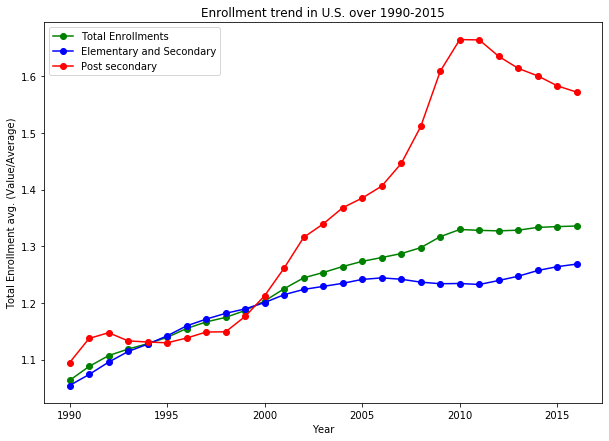

In [95]:
x = data['Year'][12:].values
y = data['Total Enrollment'][12:].div(data['Total Enrollment'].mean()).values
y1 = data['Elementary & Secondary enrollment'][12:].div(data['Elementary & Secondary enrollment'].mean()).values
y2 = data['Degree-granting postsecondary institutions Total'][12:].div(data['Degree-granting postsecondary institutions Total'].mean()).values

fig, axs = plt.subplots(nrows=1, figsize=(10, 7))
plot_graph(x, y, '-og', "Year", "Total Enrollment avg.", "Enrollment trend in U.S.",label="Total Enrollments")
# plt.show()
# fig, axs = plt.subplots(nrows=1, figsize=(10, 7))
plot_graph(x, y1, '-ob', "Year", "Total Enrollment avg.", "Enrollment trend in U.S.", label="Elementary and Secondary")
# plt.show()
# fig, axs = plt.subplots(nrows=1, figsize=(10, 7))
plot_graph(x, y2, '-or', "Year", "Total Enrollment avg. (Value/Average)", "Enrollment trend in U.S. over 1990-2015", label="Post secondary", legend=True)
plt.show()


### 1.2 Comapre enrollment growth over the years between post secondary and secodary graduation


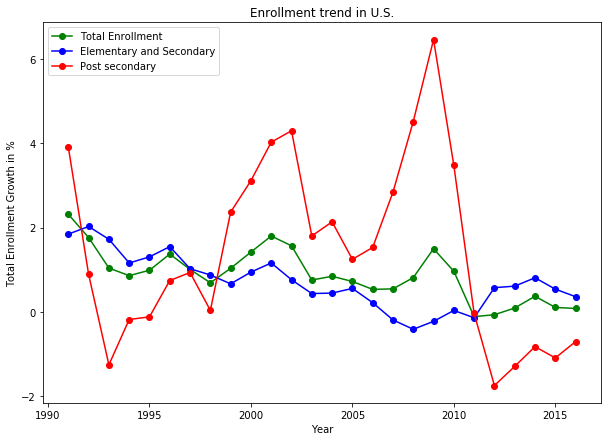

In [97]:
x = data['Year'][13:].values
y = data['Total Enrollment'].pct_change()[13:].mul(100).values
y1 = data['Elementary & Secondary enrollment'].pct_change()[13:].mul(100).values
y2 = data['Degree-granting postsecondary institutions Total'].pct_change()[13:].mul(100).values

fig, axs = plt.subplots(nrows=1, figsize=(10, 7))
plot_graph(x, y, '-og', "Year", "Total Enrollment Growth in %", "Enrollment trend in U.S.", label='Total Enrollment')
plot_graph(x, y1, '-ob', "Year", "Total Enrollment Growth in %", "Enrollment trend in U.S.",
          label="Elementary and Secondary")
plot_graph(x, y2, '-or', "Year", "Total Enrollment Growth in %", "Enrollment trend in U.S.",
          label="Post secondary", legend=True)

plt.show()


## 2. INCREAMENT OF GRADUATE COURSES'S TUTION FEES

**Data**
1. Inflation rate in United States by US INFLATION CALCULATOR [link](https://www.usinflationcalculator.com/inflation/historical-inflation-rates/)
2. Average graduate tuition and required fees in degree-granting postsecondary institutions, by control of institution and percentile of charges: 1989-90 through 2016-17 [link](https://nces.ed.gov/programs/digest/d17/tables/dt17_330.50.asp)

**Visualization Takeaway**

1. The growth rate of graduation program tution fees is higher than the growth rate of inflation in U.S.
2. The graduate program tution fees increase in Public Institutions is high comparitively to the Private Institutions
3. Although the percentage of tution fee increament in Public Institutions in leading than Private Institutions over a time, the fees of Private Institutions is high than Public Institutions(almost 100% high in 2016 and 300% high in 2000)

As shown in graph below, the growth rate of graduate program fees over a time is even higher than growth rate percentage of overall inflation in U.S
The tution fee were incrased by highest percent in 2002 by Public Universities and in consequent year 2003 by Private  Universities. As we saw in previous visualization that the number of enrollment increased drastically from 2000 might be reason of increase in tution fees of courses. Although, the first significant decreament in 2002 followed by increament in 2003 in tution fees in Private Universities is still subject to research. The fact that, the fees in Private Universities are comparitively very high than Public Universities could be the reason behind less percentage of increament in tution fees in Private Universities than Public Universities. 


In [99]:
data = pd.read_csv('data/NCES_graduate_fees.csv').apply(pd.to_numeric)
inflation = pd.read_csv('data/inflation_rate.csv')
data


,Year,Total,Public Institutions,Private Institutions,PI Profit,PI Non-profit,PB 25Percentile,PB Median,PB 75Percentile,NP 25Percentile,NP Median,NP 75Percentile
0,1999,8069,4042,13821,14123,9611,2640,3637,5163,7998,12870,20487
1,2000,8429,4243,14420,14457,13229,2931,3822,5347,8276,13200,21369
2,2001,8857,4496,15165,15232,13414,3226,4119,5596,8583,14157,22054
3,2002,9226,4842,14983,15676,9644,3395,4452,5927,8690,14140,22700
4,2003,10312,5544,16209,16807,12542,3795,5103,7063,9072,15030,25600
5,2004,11004,6080,16751,17551,13133,4236,5663,7616,9300,16060,26140
6,2005,11621,6493,17244,18171,13432,4608,6209,7977,9745,16222,26958
7,2006,12312,6894,18108,19033,14421,4909,6594,8341,10346,17057,29118
8,2007,13002,7415,18878,19896,14713,5176,6990,9288,10705,17647,30247
9,2008,13647,7999,19230,20485,14418,5612,7376,9912,11290,18270,30514


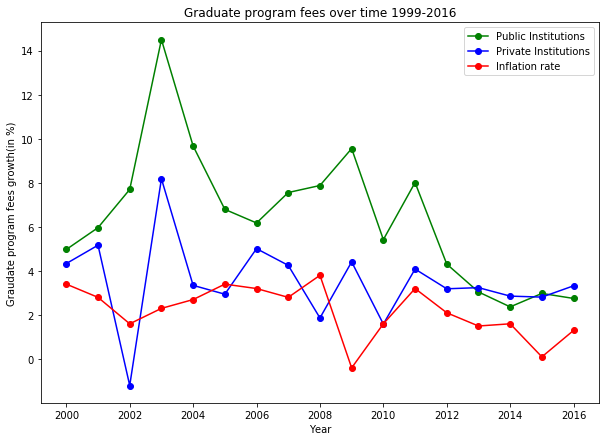

In [105]:
x = data['Year'][1:].values
y = data['Public Institutions'].pct_change().mul(100)[1:].values
y1 = data['Private Institutions'].pct_change().mul(100)[1:].values
y2 = inflation['Inflation'][1:].values  # Already percentage value

fig, axs = plt.subplots(nrows=1, figsize=(10, 7))
plot_graph(x, y, '-og', "Year", "Graudate program fees growth(in %)", "Graduate program fees over time 1999-2016", label='Public Institutions')
plot_graph(x, y1, '-ob', "Year", "Graudate program fees growth(in %)", "Graduate program fees over time 1999-2016", label='Private Institutions')
plot_graph(x, y2, '-or', "Year", "Graudate program fees growth(in %)", "Graduate program fees over time 1999-2016", label='Inflation rate')
plt.legend()


## 3. INCREAMENT OF EDUCATION LOANS

**Data**

1. Percentage of graduate degree completers with student loan debt and average cumulative amount owed, by level of education funded and graduate degree type, institution control, and degree program: Selected years, 1999-2000 through 2015-16 by NCES [link](https://nces.ed.gov/programs/digest/d17/tables/dt17_332.45.asp)


**Visualization Takeaway**

1. Between the period of 2000-2016 almost 50% of total students pursuing higher education in any major or university had student/education loan at the time of their graduation
2. The largest increament in loans happened between 2000-2004 which is also the perod when Public and Private Institutaions increased the tution fees with the highest percent of amount. 

As shown in graph below, between the period of 2000-2016 almost 50% of total students pursuing higher education in any major or university had student/education loan at the time of their graduation. And the trend of education loans for higher education in students in increasing over a time with a 1-4% a year. 

This shows that as the number of students enrolling in graduate courses increased each year, around 50% of those students take loans to sponsor their higher study each year. Therefore, the number of students taking loans each year for higher programs is increasing. 

The second graph shows us that the amount of loan taken by students to fund their higher studies is increasing over a time, which is obvious now considering we have the insight into the growth of tution fees for graduate courses. As the expenses of higher studies increases, the amount of loans taken by students also increases over a time. 

NOTE:
Both charts represent the data at the end of their graduation course completion. Which means that it covers the student with grants, side income during the course etc. during the course if the student had any. 

In [140]:
data = pd.read_csv('data/NCES_student_loan.csv').apply(pd.to_numeric)
data

,Year,Percent of graduate degree completers with student loan debt,Average cumulative amount owed
0,2000,51.3,37900
1,2004,60.9,45600
2,2008,62.9,51700
3,2012,64.1,73100
4,2016,60.5,82800


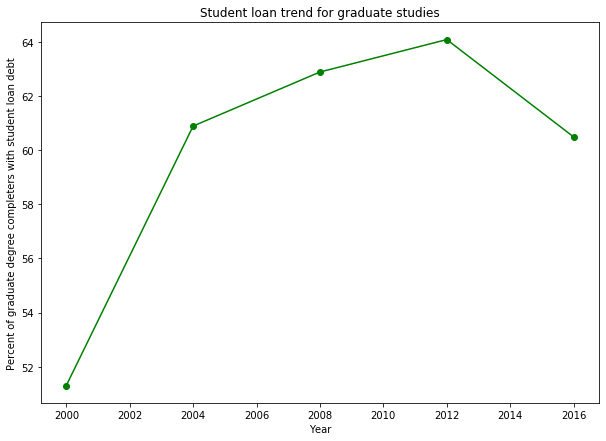

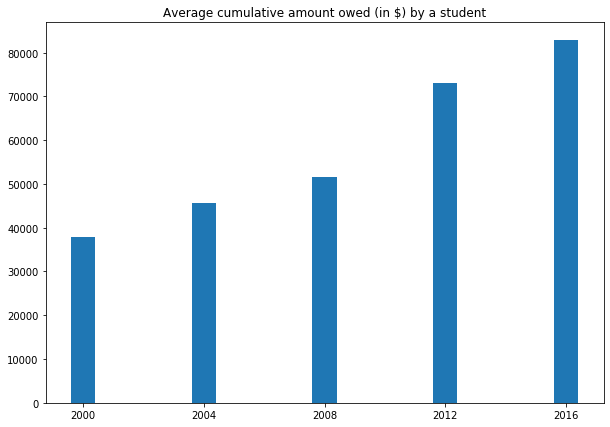

In [142]:
x = data['Year'].values
y = data['Percent of graduate degree completers with student loan debt'].values
y1 = data['Average cumulative amount owed'].values

fig, axs = plt.subplots(nrows=1, figsize=(10, 7))
plot_graph(x, y, '-og', "Year", "Percent of graduate degree completers with student loan debt", "Student loan trend for graduate studies")

fig, axs = plt.subplots(nrows=1, figsize=(10, 7))
# print(x,y1, len(x), len(y1))
plt.bar(x, y1)
plt.title("Average cumulative amount owed (in $) by a student")
plt.xticks(x)
print()

In [146]:
data = pd.read_csv('data/non_mortage_loans.csv')
data

,Quarter,04:Q1,04:Q2,04:Q3,04:Q4,05:Q1,05:Q2,05:Q3,05:Q4,06:Q1,...,12:Q3,12:Q4,13:Q1,13:Q2,13:Q3,13:Q4,14:Q1,14:Q2,14:Q3,14:Q4
0,HELOC,328,367,426,468,502,528,541,565,582,...,573,563,552,540,535,529,526,521,512,510
1,Auto Loan,720,743,751,728,725,774,830,792,788,...,768,783,794,814,845,863,875,905,934,955
2,Credit Card,695,697,706,717,710,717,732,736,723,...,674,679,660,668,672,683,659,669,680,700
3,Student Loan,260,263,330,346,364,374,378,392,435,...,956,967,986,994,1027,1080,1111,1118,1126,1157
4,Other,447,423,410,423,394,402,405,416,418,...,311,317,307,296,304,317,314,323,327,335


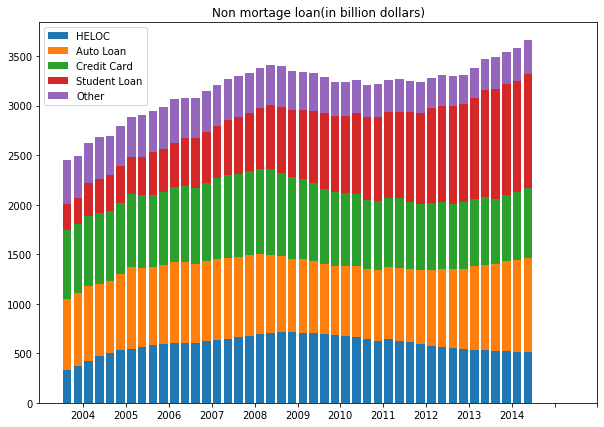

In [184]:
x = data.columns.values[1:]
y1 = data[data['Quarter']=='HELOC'].values[0][1:]
y2 = data[data['Quarter']=='Auto Loan'].values[0][1:]
y3 = data[data['Quarter']=='Credit Card'].values[0][1:]
y4 = data[data['Quarter']=='Student Loan'].values[0][1:]
y5 = data[data['Quarter']=='Other'].values[0][1:]

labels = np.array(range(2004, 2015, 1))
# print(labels)
fig, axs = plt.subplots(nrows=1, figsize=(10, 7))
# print(x,y1, len(x), len(y1))
p1 = plt.bar(x, y1)
plt.title("Non mortage loan(in billion dollars)")
# plt.xticks(labels)
# plt.xlabels(labels)
# print()
p2 = plt.bar(x, y2, bottom=y1)
p3 = plt.bar(x, y3, bottom=y2+y1)
p4 = plt.bar(x, y4, bottom=y3+y1+y2)
p5 = plt.bar(x, y5, bottom=y4+y3+y1+y2)

plt.legend((p1[0], p2[0], p3[0], p4[0], p5[0]), ('HELOC', 'Auto Loan', 'Credit Card', 'Student Loan', 'Other'))
# plt.xticks(np.arange(0, len(x), step=4))
plt.xticks(np.array(range(0,13*4,4))+1.5, set(labels))
print()


## 4. SCNEARIO TODAY
(2018-2019 year)

Let's address following questions with data

1. Overall students enrolled into different graduate courses over a year 2019
2. Graduate courses tution fees in top colleges, top courses 
3. Number of students and amount of loans taken by students to sponsor their graduate studies
4. Students who are currently paying off their debt of student loans
5. How much student loans contribute to the economy overall
6. What experts say about the student loans and debts in coming future years


### 4.1 Overall students enrolled into different graduate courses over a year 2019

**Data**:
1. College Graduation Statistics by EducationData [link](https://educationdata.org/number-of-college-graduates/)

**Visualization Takeaway**:
1. 35% of the US population had completed 4 years of college or more. Comparatively, in 1940, this number was only 4.6% of the population
2. 3700000 students graduated in 2019


In [133]:
data = pd.read_csv('data/2019_Graduates.csv')
data

,Year,Enrollment,Type
0,2019,989000,Associate Degree
1,2019,820000,Master's Degree
2,2019,184000,Doctorate Degree
3,2019,1900000,Bachelor's Degree
4,2019,3700000,Total
5,2019,3300000,Public Schools
6,2019,300000,Private Schools
7,2000,68685,Total
8,2000,15312,Post secondary


Total 1004000 (27.14%) students graduated from post-graduation courses in 2019.
5364.618184465313% higher than 2000 year's total graduation number.


Text(0.5, 1.0, 'Distribution of total students graduated in year 2019 ~ 3.9 million')

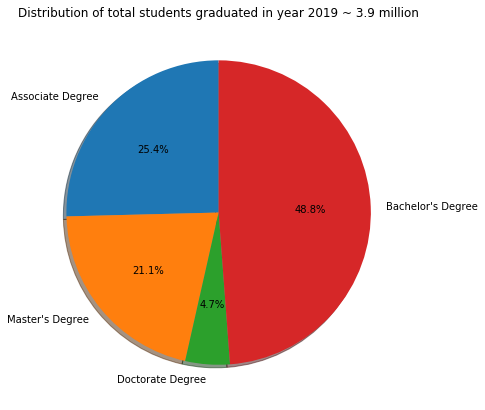

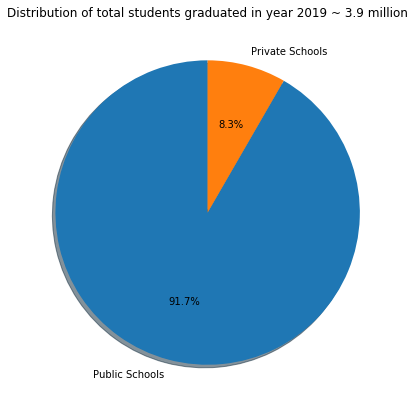

In [135]:
x = data['Enrollment'].div(data['Enrollment'][4]*0.01)[:4]
labels = data['Type'][:4]
# print(x, labels)
# print(len(x), len(labels))
# explode = (0, 0.1, 0.1, 0)
fig, axs = plt.subplots(nrows=1, figsize=(10, 7))
plt.pie(x, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
plt.title("Distribution of total students graduated in year 2019 ~ 3.9 million")
print("Total {} ({:.2f}%) students graduated from post-graduation courses in 2019.".format(
    data['Enrollment'][1]+ data['Enrollment'][2],
    float(data['Enrollment'][1]+ data['Enrollment'][2])/data['Enrollment'][4]*100))
print("{}% higher than 2000 year's total graduation number.".format((data['Enrollment'][4]-data['Enrollment'][8])/data['Enrollment'][7]*100))

fig, axs = plt.subplots(nrows=1, figsize=(10, 7))
x = data['Enrollment'].div(data['Enrollment'][4]*0.01)[5:7]
labels = data['Type'][5:7]
plt.pie(x, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
plt.title("Distribution of total students graduated in year 2019 ~ 3.9 million")


### 4.2. Graduate courses tution fees in top colleges, top courses 

**Data**
1. Average undergraduate tuition and fees and room and board rates charged for full-time students in degree-granting postsecondary institutions, by level and control of institution: Selected years, 1963-64 through 2017-18 [link](https://nces.ed.gov/programs/digest/d18/tables/dt18_330.10.asp)


**Visualization Takeaway**
1. The average expenses of a year for an undergraduate student is $23835, which is 120% higher than year 2000.
2. The average expenses of a year for an undergraduate course is almost 3 times in Private Institutions than Public Institutions.


In [131]:
data = pd.read_csv('data/2018_fees.csv')
data

,Year,Enrollment,Type
0,2018,42681,Private Institutions
1,2018,17797,Public Institutions
2,2018,23835,Total
3,2000,7586,Public Institutions
4,2000,21373,Private Institutions
5,2000,10820,Total


### 4.3 Number of students and amount of loans taken by students to sponsor their graduate studies

**Data**
1. QUARTERLY REPORT ON HOUSEHOLD DEBT AND CREDIT[link](https://www.newyorkfed.org/medialibrary/interactives/householdcredit/data/pdf/hhdc_2019q3.pdf)

**Visualization Takeaway**
1. $1.64 trillion Total Student debt till 2019 in U.S.
2. 44.7 million Americans with student loan debt, total 69% of 2019 graduate students

### 4.4 Students who are currently paying off their debt of student loans

